In [2]:
import pandas as pd
import os

file_name=os.path.join('微信聊天导出','hwqh h15709438996(wxid_x5gmcr15xi3b22).csv')
df=pd.read_csv(file_name,error_bad_lines=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54532 entries, 0 to 54531
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   时间      54532 non-null  object
 1   对方      54532 non-null  object
 2   你的回复    54532 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


C:\Users\13402\AppData\Local\Temp\ipykernel_12652\1769741266.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file_name,error_bad_lines=False)
Skipping line 4856: expected 3 fields, saw 7
Skipping line 4857: expected 3 fields, saw 6
Skipping line 22708: expected 3 fields, saw 4
Skipping line 23885: expected 3 fields, saw 4
Skipping line 24565: expected 3 fields, saw 4
Skipping line 26283: expected 3 fields, saw 4
Skipping line 29194: expected 3 fields, saw 4
Skipping line 39901: expected 3 fields, saw 4
Skipping line 39909: expected 3 fields, saw 4



In [3]:
# 获取指定时间范围内的数据
start_time='2022-10-29'
end_time='2023-10-29'
df['时间'] = pd.to_datetime(df['时间'])
start_date = pd.to_datetime(start_time)
end_date = pd.to_datetime(end_time)
df_time_select=df[(df['时间']>=start_date) & (df['时间']<=end_date)]


In [4]:
# 获取总共微信条数，自己微信条数，对方微信条数
msg_num_all=len(df_time_select)
msg_me=len(df_time_select[df_time_select['你的回复']!=' '])
msg_you=len(df_time_select[df_time_select['对方']!=' '])
print('总条数:',msg_num_all)
print('微信主:',msg_me)
print('对方:',msg_you)

总条数: 50709
微信主: 28662
对方: 22047


In [12]:
# 常用词分析
from tqdm import tqdm
frquent_words=['猪猪','晚安','宝','啵啵','早安','爱你','哈哈哈','睡觉','嗯嗯','好滴','是嗷','可爱','呜呜呜','起床']
words_count=[0]*len(frquent_words)
for index,row in tqdm(df_time_select.iterrows()):
    for role in ['你的回复','对方']:
        for location,word in enumerate(frquent_words):
            if word in row[role]:
                words_count[location]+=1
words_count_dict={}
for index,word in enumerate(frquent_words):
    words_count_dict[word]=words_count[index]
print(words_count_dict)


50709it [00:04, 12319.00it/s]

{'猪猪': 39, '晚安': 573, '宝': 5166, '啵啵': 36, '早安': 292, '爱你': 83, '哈哈哈': 1330, '睡觉': 486, '嗯嗯': 855, '好滴': 493, '是嗷': 132, '可爱': 226, '呜呜呜': 202, '起床': 144}


In [6]:
# 每天发消息高频时间段分析，以及查询哪一天发的消息最多
import matplotlib.pyplot as plt
from tqdm import tqdm

max_msg_day=-1
max_msg_month=-1
max_msg_year=-1
day_acc=0
yesterday=-1
max_msg_day_num=-1

# 分析从0时到23时
time_list=[i for i in range(24)]
time_count=[0]*24

for index,row in tqdm(df_time_select.iterrows()):
    time_count[row['时间'].hour]+=1
    day=row['时间'].day
    if index==0:
        day_acc+=1
    if day==yesterday:
        day_acc+=1
    else:
        max_msg_day_num=max(max_msg_day_num,day_acc)
        if max_msg_day_num==day_acc:
            max_msg_day=day
            max_msg_month=row['时间'].month
            max_msg_year=row['时间'].year
        day_acc=1
    yesterday=day

print(time_count)
print('发消息最多的一天是:{}年{}月{}日,一共{}条'.format(max_msg_year,max_msg_month,max_msg_day,max_msg_day_num))


50709it [00:02, 23651.81it/s]

[3175, 0, 0, 0, 0, 4, 101, 530, 5143, 2249, 848, 590, 1583, 501, 1128, 916, 1382, 1945, 1504, 742, 741, 1309, 5903, 20415]
发消息最多的一天是:2023年7月16日,一共1014条


In [15]:
# 保存微信记录相关消息的地址
file_save_info='info.txt'
user_name='lzh'
opposite_name='hwq'

with open(file_save_info,'w',encoding='utf-8') as out:
    out.write('微信主名字:{},对方名字:{}\n'.format(user_name,opposite_name))
    out.write('消息总条数:{},微信主消息数:{},对方消息数:{}\n'.format(msg_num_all,msg_me,msg_you))
    # out.write('统计词为:{},所对应的频数为:{}\n'.format(frquent_words,words_count))
    out.write('统计词对应的频数{}\n'.format(words_count_dict))
    out.write('每天发消息0-24小时时间统计:{}\n'.format(time_count))
    out.write('发消息最多的一天是:{}年{}月{}日,一共{}条\n'.format(max_msg_year,max_msg_month,max_msg_day,max_msg_day_num))
print('结果写入{}成功'.format(file_save_info))

结果写入info.txt成功


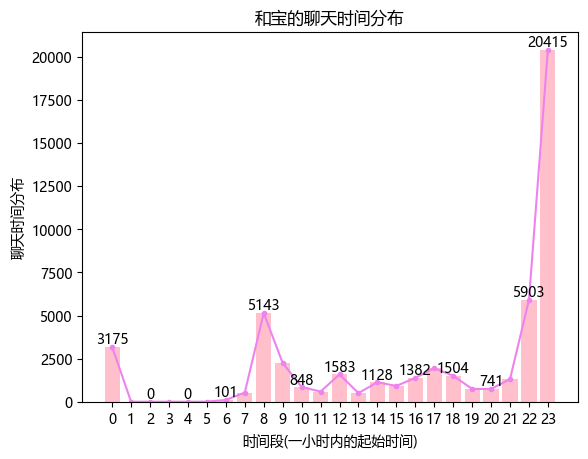

In [9]:
# 高频时间段绘制图例

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

fig, ax = plt.subplots()
ax.bar(time_list, time_count, color='pink', label='')
ax.plot(time_list, time_count, color='violet', marker='.', linestyle='-', label='折线图')
# ax.legend()

ax.set_xticks(ticks=time_list)
# 设置坐标轴标签
ax.set_xlabel('时间段(一小时内的起始时间)')
ax.set_ylabel('聊天时间分布')

# 在每个点旁边写入y轴数据，容易发生重叠
for i in range(len(time_list)):
    if i%2==0 or i==len(time_list)-1:
        ax.annotate(time_count[i], (time_list[i], time_count[i]), textcoords="offset points", xytext=(0,2), ha='center')

# 设置标题
ax.set_title('和宝的聊天时间分布')

plt.savefig('results/聊天时间分布.jpg')
# 显示图形
plt.show()

50709it [00:02, 22021.38it/s]


437962
58309


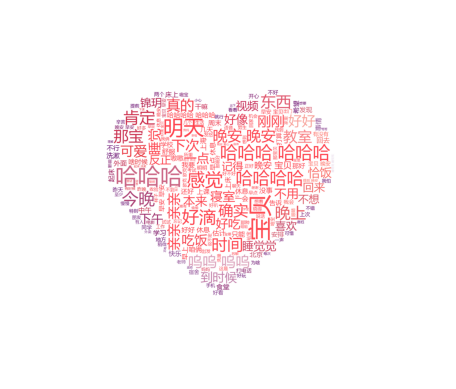

In [11]:
#-*- coding: UTF-8 -*-
from wordcloud import WordCloud,ImageColorGenerator
from tqdm import tqdm
import jieba
import numpy as np
import os
from PIL import Image

assests_path='assets'
save_path='results'

all_content=""
for index,row in tqdm(df_time_select.iterrows()):
    if row['对方']!=' ':
        all_content+=row['对方']+'。'
    if row['你的回复']!=' ':
        all_content+=row['你的回复']+'。'

print(len(all_content))

seg_list_exact = jieba.cut(all_content, cut_all=False)
with open(os.path.join(assests_path,'stop_words.txt'), encoding='utf-8') as f:
    con = f.readlines()

stop_words_list=set()
for i in con:
    i = i.replace("\n", "") # 去掉读取每一行数据的\n
    stop_words_list.add(i)

content_not_in_stop_words=[]
for word in seg_list_exact:
    # 设置停用词并去除单个词
    if word not in stop_words_list and len(word) > 1:
        content_not_in_stop_words.append(word)

print(len(content_not_in_stop_words))

cnisw_str='、'.join(content_not_in_stop_words)
backgroud_Image = np.array(Image.open(os.path.join(assests_path,'heart.png')))

wc = WordCloud(background_color="white",mask=backgroud_Image,max_font_size=100,font_path='msyh.ttc')
wc.generate(cnisw_str)


plt.axis("off")
#根据原始背景图片的色调进行上色
image_colors = ImageColorGenerator(backgroud_Image)
plt.imshow(wc.recolor(color_func=image_colors))
#根据原始黑白色调进行上色
#plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear') #生成黑白词云图
#根据函数原始设置进行上色
#plt.imshow(wc)
plt.show()

wc.to_file(os.path.join(save_path,"词云图.png"))